In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [5]:
df=pd.read_csv('C:\\Users\\COMSOL\\Documents\\Real estate.csv')

In [6]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [9]:
df=df.rename(columns={'X1 transaction date':'date','X2 house age':'age','X3 distance to the nearest MRT station':'neighborhood','X4 number of convenience stores':'store','Y house price of unit area':'price'})

In [10]:
df.head()

,No,date,age,neighborhood,store,X5 latitude,X6 longitude,price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
df.describe()


,No,date,age,neighborhood,store,X5 latitude,X6 longitude,price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [12]:
df.isnull().sum()

No              0
date            0
age             0
neighborhood    0
store           0
X5 latitude     0
X6 longitude    0
price           0
dtype: int64

In [13]:
df1=df.drop(['No','date','X5 latitude','X6 longitude'],axis='columns')

In [14]:
df1.corr()

,age,neighborhood,store,price
age,1.000000,0.025622,0.049593,-0.210567
neighborhood,0.025622,1.000000,-0.602519,-0.673613
store,0.049593,-0.602519,1.000000,0.571005
price,-0.210567,-0.673613,0.571005,1.000000


In [15]:
df1.head()

,age,neighborhood,store,price
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


In [16]:
df1.isnull().sum()

age             0
neighborhood    0
store           0
price           0
dtype: int64

In [17]:
df1.shape

(414, 4)

In [18]:
df1['age'].unique()

array([32. , 19.5, 13.3,  5. ,  7.1, 34.5, 20.3, 31.7, 17.9, 34.8,  6.3,
       13. , 20.4, 13.2, 35.7,  0. , 17.7, 16.9,  1.5,  4.5, 10.5, 14.7,
       10.1, 39.6, 29.3,  3.1, 10.4, 19.2, 25.9, 29.6, 37.9, 16.5, 15.4,
       13.9, 12. , 16.2, 13.6, 16.8, 36.1, 34.4,  2.7, 36.6, 21.7, 35.9,
       24.2, 29.4, 31.3, 32.1, 16.1, 33.6,  3.5, 30.3, 11. ,  5.3, 17.2,
        2.6, 17.5, 40.1,  1. ,  8.5, 30.4, 12.5,  6.6, 35.5, 32.5, 13.8,
        6.8, 12.3, 20.5, 38.2, 18. , 11.8, 30.8, 25.3, 15.1,  1.8,  8.9,
       23. ,  9.1, 20.6, 31.9, 40.9,  8. ,  6.4, 28.4, 16.4, 12.7,  1.1,
       32.7, 12.2, 31.4,  4. ,  8.1, 33.3,  9.9, 14.8, 30.6, 30.9, 16.6,
       31.5, 38.6,  3.8, 41.3, 38.5, 26.6, 33.4, 18.9, 11.4, 10. , 12.9,
        5.1, 19.8, 11.9,  2.1,  3.2, 34.9, 35.8,  4.9,  6.5, 30.7, 11.6,
       15.5, 16. , 13.7, 28.2, 27.6,  8.4, 24. ,  3.6,  4.3, 30.2, 33. ,
       13.1, 14. , 26.9, 13.5, 17. , 14.1, 20.9, 16.3, 35.3, 43.8,  9.7,
       15.2, 22.8, 34. , 18.2, 17.4, 38.3, 15.6, 12

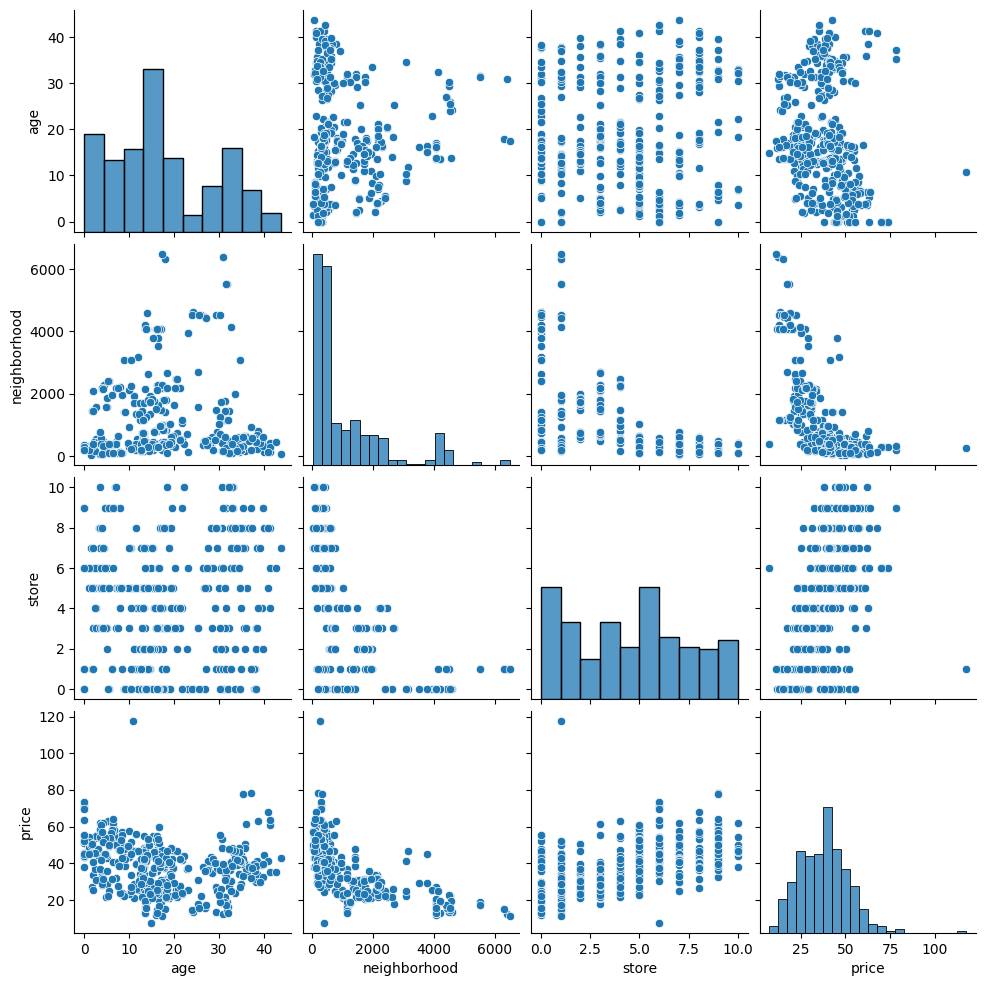

In [19]:

sns.pairplot(df1)

In [20]:
df1.price.max()

117.5

In [21]:
df1[df1.price>100]

,age,neighborhood,store,price
270,10.8,252.5822,1,117.5


In [22]:
df1=df1.drop([270])

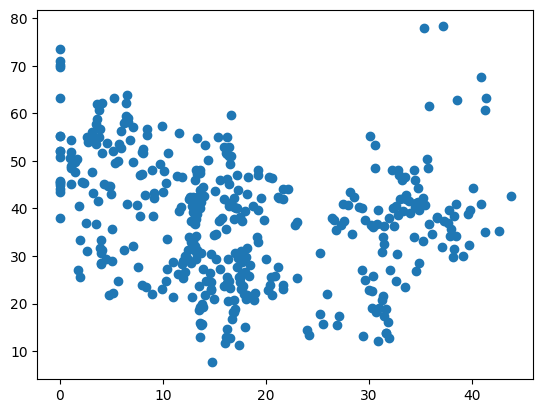

In [23]:
plt.scatter(df1['age'],df1['price'])
plt.xlabel=("age")
plt.ylabel=("price")


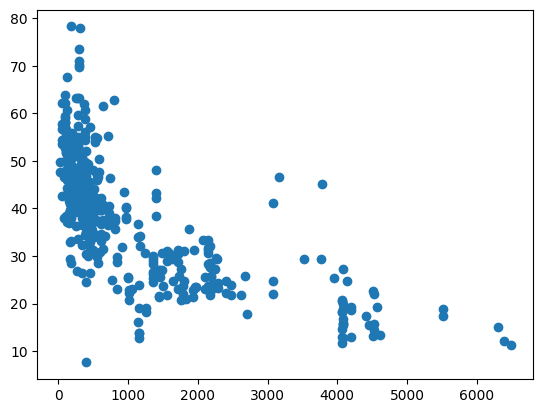

In [24]:
plt.scatter(df1['neighborhood'],df1['price'])
plt.xlabel=("age")
plt.ylabel=("price")

<AxesSubplot:xlabel='age', ylabel='price'>

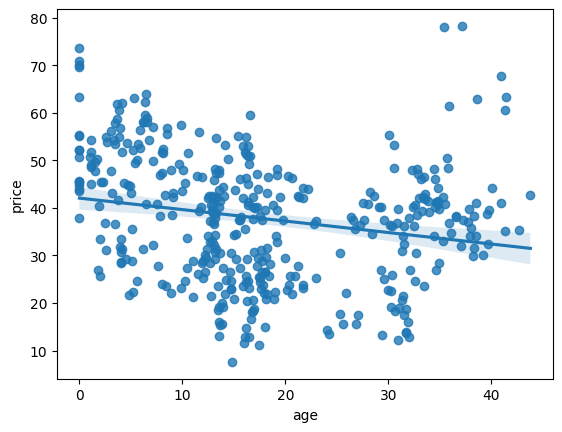

In [25]:
import seaborn as sns
sns.regplot(x="age",y="price", data=df1)

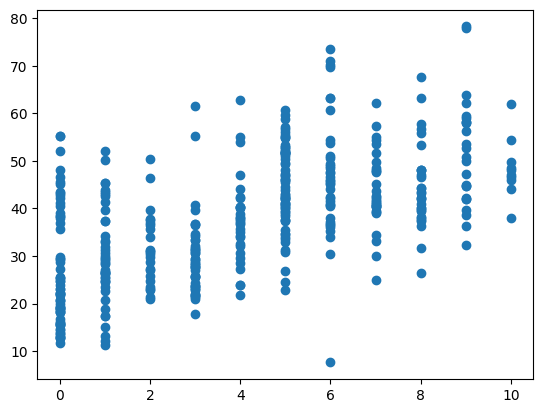

In [26]:
plt.scatter(df1['store'],df1['price'])
plt.show()

<AxesSubplot:xlabel='neighborhood', ylabel='price'>

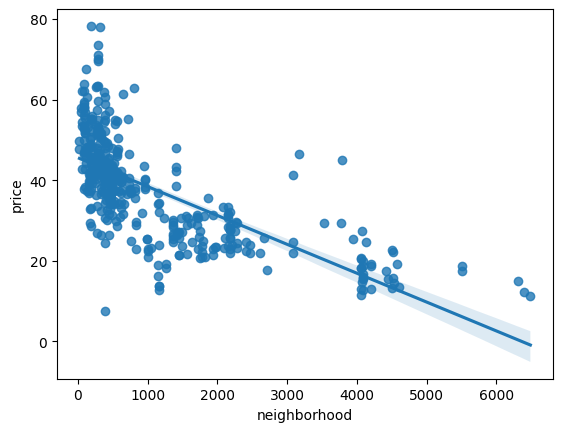

In [27]:

sns.regplot(x="neighborhood",y="price", data=df1)

<AxesSubplot:xlabel='X5 latitude', ylabel='price'>

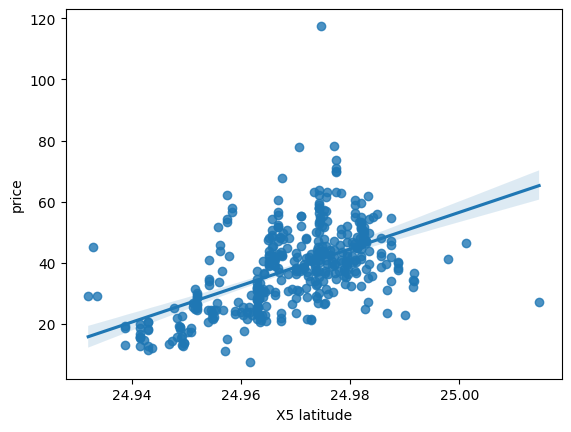

In [28]:
sns.regplot(x="X5 latitude",y="price", data=df)

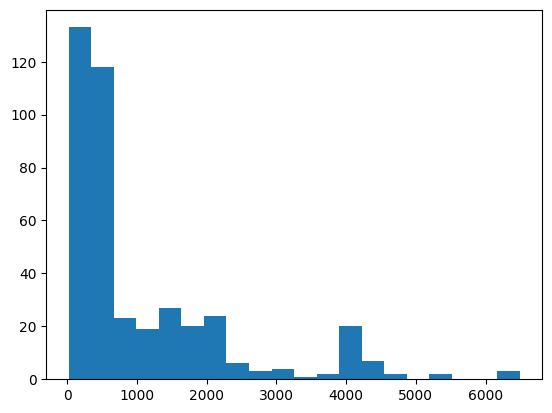

In [29]:
plt.hist(df.neighborhood, bins=20)
plt.show()

In [30]:
df.price.min()


7.6

In [31]:
X=df1.iloc[:,:-1]
Y=df1.iloc[:,-1]

In [32]:
X.head()

,age,neighborhood,store
0,32.0,84.87882,10
1,19.5,306.59470,9
2,13.3,561.98450,5
3,13.3,561.98450,5
4,5.0,390.56840,5


In [33]:
Y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: price, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [35]:
X_train

,age,neighborhood,store
279,2.6,1554.25000,3
373,0.0,274.01440,1
81,30.8,377.79560,6
412,8.1,104.81010,5
48,24.2,4605.74900,0
...,...,...,...
108,31.4,592.50060,2
78,38.2,552.43710,2
172,6.6,90.45606,9
271,17.7,451.64190,8


In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [37]:
X_train=scaler.fit_transform(X_train)

In [38]:
X_test=scaler.transform(X_test)

In [39]:
import pickle
pickle.dump(scaler,open('scaling.pk1','wb'))

In [40]:
X_train

array([[-1.29026464e+00,  3.72378512e-01, -3.48784423e-01],
       [-1.51622028e+00, -6.54946469e-01, -1.02984276e+00],
       [ 1.16048499e+00, -5.71667251e-01,  6.72803088e-01],
       [-8.12281557e-01, -7.90724449e-01,  3.32273917e-01],
       [ 5.86905291e-01,  2.82105370e+00, -1.37037193e+00],
       [-1.07299960e+00,  3.76853775e-01, -3.48784423e-01],
       [-8.99187573e-01, -5.12728747e-01,  3.32273917e-01],
       [ 1.93394853e+00, -6.07318256e-01,  1.69439060e+00],
       [-1.42062367e+00, -7.19487437e-01,  6.72803088e-01],
       [-5.16801105e-01,  2.16614152e-01, -1.02984276e+00],
       [-4.12513886e-01, -7.38309382e-01, -1.02984276e+00],
       [-1.16859622e+00,  8.48332435e-01, -3.48784423e-01],
       [ 1.62108687e+00, -4.57987297e-01,  3.32273917e-01],
       [ 1.35167823e+00, -7.29524401e-01,  1.69439060e+00],
       [ 1.22131920e+00, -6.67647967e-01,  1.69439060e+00],
       [-9.09616294e-02, -6.42660639e-01,  3.32273917e-01],
       [-1.29895524e+00, -7.49451159e-01

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
regression=LinearRegression()

In [43]:
regression.fit(X_train,Y_train)

LinearRegression()

In [44]:
print(regression.coef_)

[-2.89189259 -6.50683159  4.13341082]


In [45]:
print(regression.intercept_)

37.72878787878788


In [46]:
reg_pred=regression.predict(X_test)

In [47]:
reg_pred

array([46.51514311, 44.12499088, 44.81392075, 41.65122544, 44.75011103,
       39.55320441, 16.66093023, 41.31088854, 43.87511505, 34.18736324,
       36.34857439, 37.81565434, 27.82230942, 42.817256  , 49.43245118,
       39.64184742, 51.55331565, 49.49878108, 28.25638   , 29.87806813,
       38.39735637, 30.10643044, 43.01907376, 44.59115172, 30.64155856,
       48.04864957, 48.65586885, 39.61596473, 44.42975903, 17.35947525,
       16.81172395, 37.937746  , 34.17174933, 12.38363678, 17.38460753,
       42.65165371, 39.37841616, 15.7473389 , 44.96044869, 51.1850683 ,
       28.31248488, 43.19119496, 49.32476636, 32.57997695, 49.29963408,
       41.52891438, 28.11452454, 43.67260972, 43.67260972, 32.2536133 ,
       43.59721287, 51.49534396, 52.45084407, 46.5730465 , 35.49544337,
       38.422969  , 36.88225125, 45.78286577, 32.96017656, 16.83266639,
       41.94632776, 44.08206119, 46.27026168, 43.66365899, 42.11839723,
       47.05174288, 33.24978525, 16.80753411, 44.12247123, 39.76

In [48]:
score=regression.score(X_test,Y_test)

In [49]:
score

0.5830071433566679

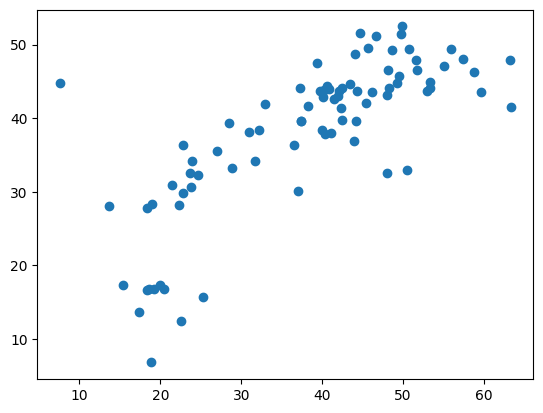

In [50]:
plt.scatter(Y_test,reg_pred)

In [51]:
from sklearn.metrics import r2_score
score1=r2_score(Y_test,reg_pred)
print(score1)

0.5830071433566679


In [52]:
import pickle

In [53]:
pickle.dump(regression,open('regmodel.pk1','wb'))

In [54]:
pickled_model=pickle.load(open('regmodel.pk1','rb'))